# Применение метода фрактальной сигнатуры

Источники:

- [Довольно понятно объяснено, что мы делаем, и что это за "покрывала"](https://www.researchgate.net/publication/259695438_Application_of_the_Modified_Fractal_Signature_Method_for_Terrain_Classification_from_Synthetic_Aperture_Radar_Images)
- [Статья от Ампиловой](https://drive.google.com/open?id=1_gSwKN7Gt_i2qTQ9ThOgkzglllp6Tq-H)

In [31]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

Загружаем картинку

Можно любую свою, только надо, чтобы она была в Gray scale, i guess

In [5]:
im = Image.open(BytesIO(requests.get('http://creativeskillset.org/assets/0000/1452/Anthophyllite-Asbestos-Scanning-Electron-Microscopy-Asbestos-Hunter_square.jpg?1394979307').content))

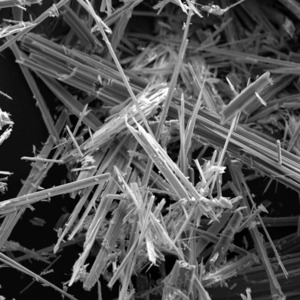

In [6]:
im

In [13]:
imar = np.array(im)

In [14]:
imar

array([[203, 201, 198, ...,  20,  14,  13],
       [150, 143, 133, ...,  34,  19,  16],
       [ 94,  92,  90, ...,  57,  40,  31],
       ...,
       [158, 172, 176, ...,  21,  23,  24],
       [145, 168, 180, ...,  26,  28,  29],
       [120, 158, 170, ...,  31,  32,  33]], dtype=uint8)

In [16]:
from scipy.ndimage.filters import maximum_filter, minimum_filter

Начинаем с того, что:
- $\delta = [1, d] -$по факту, просто шаг
- $u_0 = b_0 = $исходной марице

Вот хорошая иллюстрация одеяла, которое мы строим. Картинку спер из первой статьи

![blanket](images/blanket.png)

Вот, что надо посчитать итеративно:

$$u_{\delta}(i, j) = max\{u_{\delta - 1}(i, j) + 1, \underset{|(m,n) - (x,y) \le 1|}{max} u_{\delta-1}(m,n) \}$$

$$b_{\delta}(i, j) = min\{b_{\delta - 1}(i, j) - 1, \underset{|(m,n) - (x,y) \le 1|}{min} b_{\delta-1}(m,n) \}$$

В результате, можно посчитать объем на шаге $\delta$ следующим образом:

$$Vol_{\delta} = \sum (u_{\delta}(i, j) - b_{\delta}(i, j))$$

In [64]:
u = imar
b = imar

footprint=np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]])
ds = range(1, 50)
vols = []

for d in ds:
    fst_u = u + 1
    fst_b = b - 1

    scnd_u = maximum_filter(u, mode='constant', footprint=footprint)
    scnd_b = minimum_filter(b, mode='constant', footprint=footprint, cval=255)

    u = np.maximum(fst_u, scnd_u)
    b = np.minimum(fst_b, scnd_b)
    
    vols.append(np.sum(u - b))

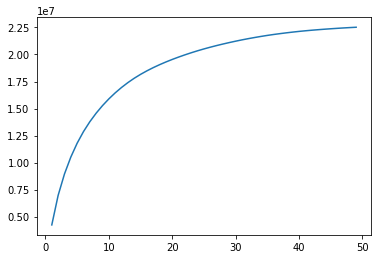

In [66]:
plt.plot(ds, vols)